In [1]:
# check_concat_dataset
from resnet_exp.dataloaders import get_dataset_loaders
from torchvision import transforms

dataset_names = {
    "train": ["liveness_simple", "flash_ds"],
    "val": ["liveness_simple"]
}

resize_size = 128
s_transf = transforms.Compose([
                transforms.Resize(resize_size),
                transforms.CenterCrop(resize_size), #why resize and center_crop are needed
                transforms.ToTensor()])

transforms = {
    "train": s_transf,
    "val": s_transf
}
# def get_dataset_loaders(dataset_names,
#                            transforms,
#                            use_ffcv = False,
#                            resize_size = None,
#                            batch_size = 32,
#                            num_workers = 4):
train_dataloader, val_dataloader = get_dataset_loaders(dataset_names, transforms)
train_dataloader

/home/gfuhr/miniconda3/envs/pytorch_venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


transform in dataset:  {0: 1}


In [2]:
train_dataloader.dataset.classes

['live', 'spoof']

In [3]:
for d in train_dataloader.dataset.datasets:
    print(d.class_to_idx)

{'live': 0, 'spoof': 1}
{'spoof': 0}


In [4]:
for d in train_dataloader.dataset.datasets:
    print(len(d))
print(len(train_dataloader.dataset))

539
62
601


In [5]:
val_dataloader.dataset.classes

['live', 'spoof']

In [6]:
for d in val_dataloader.dataset.datasets:
    print(d.class_to_idx)

{'live': 0, 'spoof': 1}


In [7]:
print("val_dataloader.join_class_to_idx", val_dataloader.dataset.join_class_to_idx)

val_dataloader.join_class_to_idx {'live': 0, 'spoof': 1}


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# this function will be a life saver
def plot_image_mosaic(images, labels = None, n_columns = 8):
    fig = plt.figure(figsize=(20,16))
    fig.tight_layout()

    #fig.subplots_adjust(bottom=4) # or whatever

    for i, image in enumerate(images):
        ax = plt.subplot(int(len(images) / n_columns + 1), n_columns, i + 1)
        if labels is not None:
            ax.title.set_text(labels[i])
        if image.shape[2] == 1:
            plt.imshow(image, cmap="gray")
        else:
            plt.imshow(image)

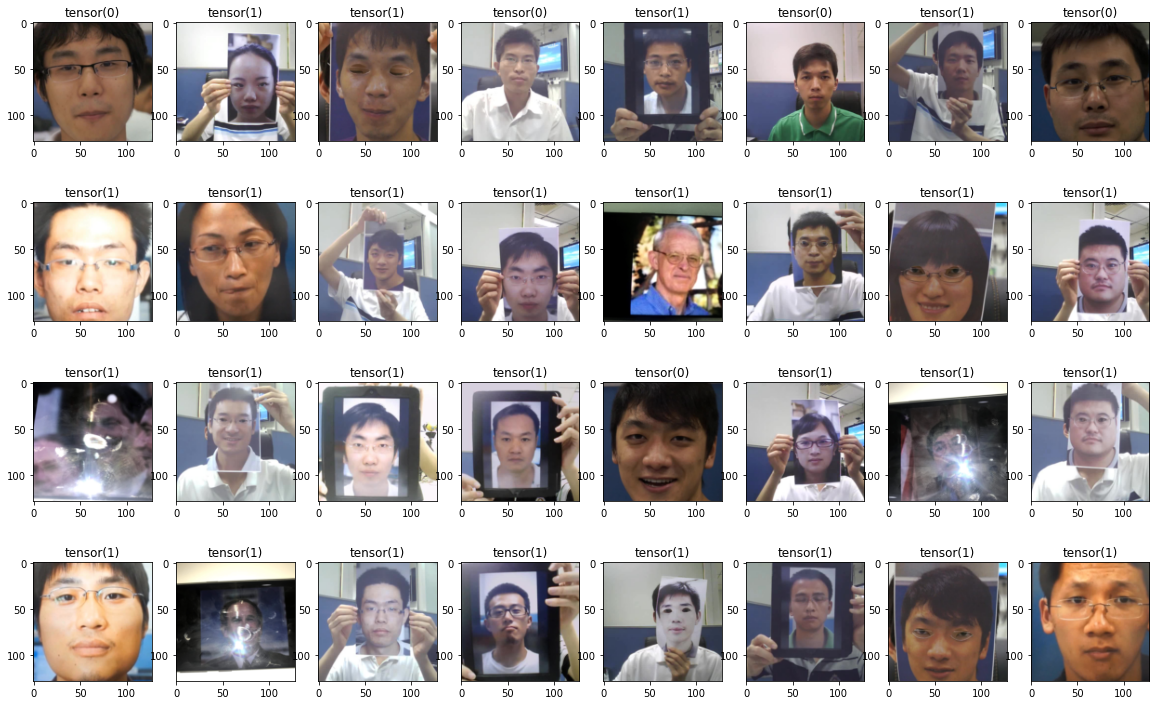

In [3]:
import numpy as np

for inputs, targets in train_dataloader:
    batch_images = [(img.permute(1, 2, 0).numpy()*255).astype(np.uint8) for img in inputs]
    #print(targets)
    batch_labels = [str(y) for y in targets]
    plot_image_mosaic(batch_images, batch_labels)
    break

In [4]:
train_batches, val_batches = 0, 0
for b in train_dataloader: train_batches += 1
for b in val_dataloader: val_batches += 1
print("train_batches", train_batches)
print("val_batches", val_batches)

train_batches 19
val_batches 103


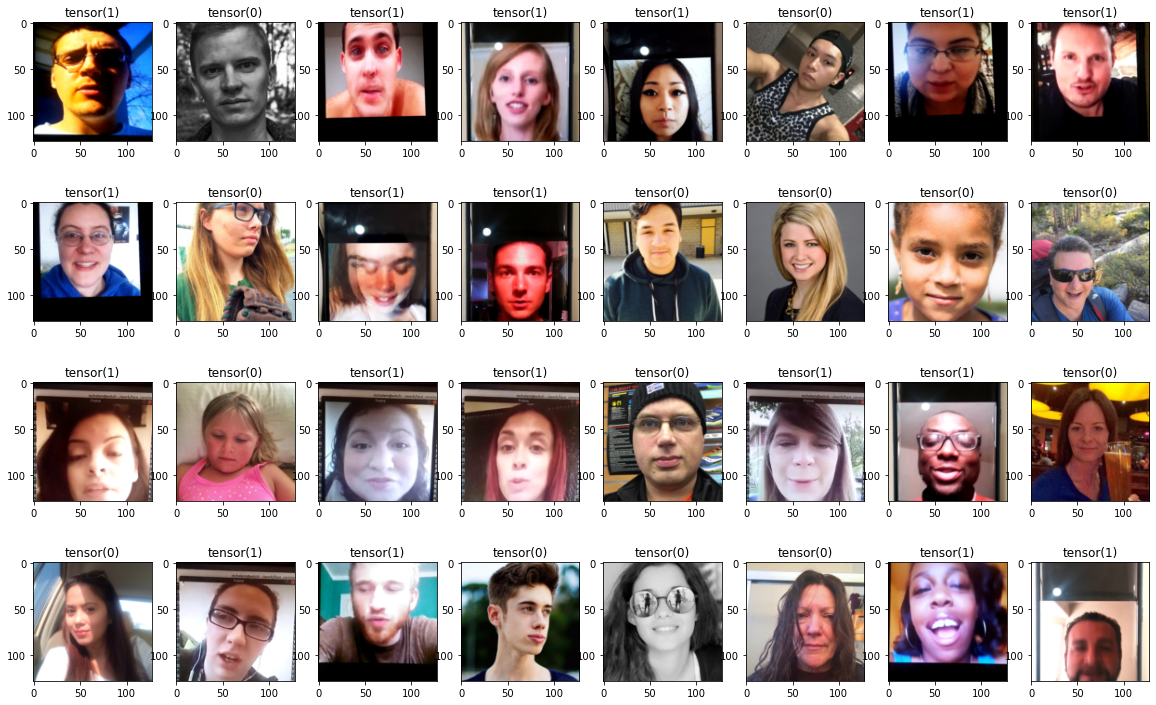

In [5]:
for inputs, targets in val_dataloader:
    batch_images = [(img.permute(1, 2, 0).numpy()*255).astype(np.uint8) for img in inputs]
    #print(targets)
    batch_labels = [str(y) for y in targets]
    plot_image_mosaic(batch_images, batch_labels)
    break

In [8]:
for inputs, targets in val_dataloader:
    print(targets)

tensor([1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 0])
tensor([0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 1, 1])
tensor([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 0, 0])
tensor([1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
        1, 0, 0, 1, 1, 0, 0, 0])
tensor([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 1, 0, 1, 0])
tensor([1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
        1, 0, 0, 1, 0, 0, 0, 1])
tensor([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 1, 1])
tensor([0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
        1, 1, 1,